In [1]:
import cv2
import os
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv
import pandas as pd
import keras
from keras import models,Model
from keras.layers import Dense,GaussianNoise, Dropout,Input
from keras.utils import np_utils
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline
from skimage.feature import hog
%matplotlib inline 

Using TensorFlow backend.


In [ ]:
def isSubstring(s1, s2): 
    M = len(s1) 
    N = len(s2) 
  
    # A loop to slide pat[] one by one  
    for i in range(N - M + 1): 
  
        # For current index i, 
        # check for pattern match  
        for j in range(M): 
            if (s2[i + j] != s1[j]): 
                break
              
        if j + 1 == M : 
            return i 
  
    return -1

dataSet = []
person = []
horiSet = []

count = 0
folder = "C:/Users/Dell/Desktop/ML_project/Dataset/train_RGB/"
for filename in os.listdir(folder):
    if isSubstring(".png",filename)!=-1:
        img = cv2.imread(os.path.join(folder,filename))
#         print(img)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200,200))
        fd, img = hog(img,visualise=True)
        img = np.ravel(img)
        if img is not None:
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person.append(numbers[0])
            horiSet.append(img.T)
            dataSet.append(img)
            count = count + 1
           
        
dataSet_test = []
person_test = []
horiSet_test = []

folder = "C:/Users/Dell/Desktop/ML_project/Dataset/test_RGB/"
for filename in os.listdir(folder):
    if isSubstring(".png",filename)!=-1:
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200, 200))
        fd, img = hog(img, visualise=True)
        img = np.ravel(img)
        if img is not None:
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person_test.append(numbers[0])
            horiSet_test.append(img.T)
            dataSet_test.append(img)
            count = count + 1

C:\Users\Dell\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\Users\Dell\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


In [77]:
#Getting data in desired format and mapping the lables
dataSet = np.array(dataSet)
train = pd.DataFrame(dataSet)

person = np.array(person)
train['id'] = person.transpose()
#print(train['id'])

unique_person = train['id']
unique_person = np.array(unique_person)
unique_person = np.unique(unique_person)
key = range(len(unique_person))

roll_dict = dict( zip(unique_person, key))
key_roll = np.fromiter(roll_dict.keys(),dtype=int)

mapped_roll = np.vectorize(roll_dict.get)(person)
train['id'] = mapped_roll.transpose()
#print(mapped_roll)

y = train['id'].values.astype('int64')
images = train.drop(['id'], axis=1, inplace=False)
x = (images.values).astype('uint8')

X_train = x
Y_train = y

dataSet_test = np.array(dataSet_test)
test = pd.DataFrame(dataSet_test)
#print(unique_person+ " " +key)

person_test = np.array(person_test)
test['id'] = person_test.transpose()

mapped_roll_test = np.vectorize(roll_dict.get)(person_test)
test['id'] = mapped_roll_test.transpose()
#print(test['id'])

temp = np_utils.to_categorical(test['id'])
#print(temp[2])
#print(temp.shape)


y_test = test['id'].values.astype('int64')
images = test.drop(['id'], axis=1, inplace=False)
x_test = (images.values).astype('uint8')

X_test = x_test
Y_test = y_test

In [78]:
#Defining and training of the neural network
model = models.Sequential()
layers = 2
units = 256

#Input layer
model.add(Dense(units, input_dim=40000, activation='relu'))

#Hidden Layer
for i in range(layers):
    model.add(Dense(124, activation='relu'))
    model.add(Dropout(0.1))
    
#Output layer
model.add(Dense(62, activation='softmax'))

#Building model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training model
model.fit(X_train,Y_train,batch_size=125,validation_split=0.2,epochs=150,verbose=2)

Train on 244 samples, validate on 62 samples
Epoch 1/150
 - 3s - loss: 10.6001 - acc: 0.0246 - val_loss: 12.9810 - val_acc: 0.0000e+00
Epoch 2/150
 - 0s - loss: 12.5369 - acc: 0.0410 - val_loss: 12.6831 - val_acc: 0.0000e+00
Epoch 3/150
 - 0s - loss: 9.9569 - acc: 0.1230 - val_loss: 12.5959 - val_acc: 0.0000e+00
Epoch 4/150
 - 0s - loss: 7.8536 - acc: 0.2295 - val_loss: 11.9320 - val_acc: 0.0000e+00
Epoch 5/150
 - 0s - loss: 5.5419 - acc: 0.3770 - val_loss: 10.9930 - val_acc: 0.0161
Epoch 6/150
 - 0s - loss: 3.6325 - acc: 0.4713 - val_loss: 9.8577 - val_acc: 0.0000e+00
Epoch 7/150
 - 0s - loss: 2.6140 - acc: 0.5082 - val_loss: 9.8630 - val_acc: 0.0323
Epoch 8/150
 - 0s - loss: 1.8283 - acc: 0.6066 - val_loss: 9.9847 - val_acc: 0.0323
Epoch 9/150
 - 0s - loss: 1.3623 - acc: 0.7131 - val_loss: 9.5969 - val_acc: 0.0323
Epoch 10/150
 - 1s - loss: 1.0553 - acc: 0.7213 - val_loss: 9.8939 - val_acc: 0.0323
Epoch 11/150
 - 0s - loss: 0.8059 - acc: 0.8074 - val_loss: 10.4456 - val_acc: 0.0323
E

Epoch 96/150
 - 0s - loss: 0.0332 - acc: 0.9836 - val_loss: 13.4411 - val_acc: 0.0323
Epoch 97/150
 - 0s - loss: 0.0296 - acc: 0.9877 - val_loss: 13.3489 - val_acc: 0.0323
Epoch 98/150
 - 1s - loss: 0.1350 - acc: 0.9631 - val_loss: 13.3290 - val_acc: 0.0323
Epoch 99/150
 - 1s - loss: 0.0747 - acc: 0.9795 - val_loss: 13.4774 - val_acc: 0.0323
Epoch 100/150
 - 1s - loss: 0.0270 - acc: 0.9877 - val_loss: 13.8358 - val_acc: 0.0323
Epoch 101/150
 - 1s - loss: 0.1154 - acc: 0.9672 - val_loss: 13.8664 - val_acc: 0.0323
Epoch 102/150
 - 1s - loss: 0.0576 - acc: 0.9836 - val_loss: 13.8916 - val_acc: 0.0323
Epoch 103/150
 - 1s - loss: 0.0475 - acc: 0.9836 - val_loss: 14.1765 - val_acc: 0.0323
Epoch 104/150
 - 1s - loss: 0.0721 - acc: 0.9877 - val_loss: 14.3950 - val_acc: 0.0323
Epoch 105/150
 - 1s - loss: 0.0545 - acc: 0.9918 - val_loss: 14.5368 - val_acc: 0.0323
Epoch 106/150
 - 1s - loss: 0.0246 - acc: 0.9959 - val_loss: 14.6380 - val_acc: 0.0323
Epoch 107/150
 - 0s - loss: 0.1401 - acc: 0.963

In [82]:
predictions = model.predict_classes(X_test, verbose=0)

def write_predictions(predictions, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "id": predictions}).to_csv(fname, index=False, header=True)

write_predictions(key_roll[predictions], "out.csv")


In [38]:
result = pd.read_csv('out.csv')
result = result['id']
result = np.array(result)
error = np.array(Y_test - result)
error = error[error != 0]
error = error.size/Y_test.size

print('Accuracy : ',1-error)

result

Accuracy :  0.6209677419354839


array([ 9,  0,  1,  1,  2,  3,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7, 41,
       41,  9, 24, 10, 10, 11, 11, 12, 12, 13, 13,  3, 14,  5, 15, 34,  4,
       17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25,
       25,  1, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32,  1,  1,
       34, 34, 35, 42, 36, 36, 18, 19, 38, 38, 39, 39, 16,  8, 41, 41, 42,
       26, 43, 43, 44, 44, 24, 15, 46, 15,  3, 20, 48, 48, 49, 49, 42, 23,
        8,  8, 38, 38, 21,  4,  5, 16,  3,  3, 38, 34, 34, 34, 33,  3, 23,
       42,  4, 23, 48, 39], dtype=int64)

In [39]:
score = model.predict_proba(X_test)


Average precision score, micro-averaged over all classes: 0.64


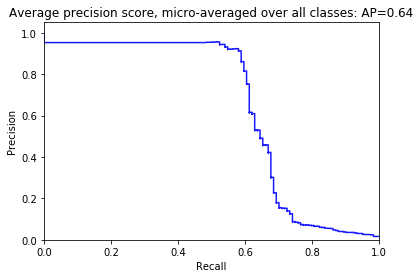

In [40]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(35):
    precision[i], recall[i], _ = precision_recall_curve(temp[:, i],
                                                        score[:, i])
    average_precision[i] = average_precision_score(temp[:, i], score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(temp.ravel(),
    score.ravel())
average_precision["micro"] = average_precision_score(temp, score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

fig = plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.9,
         where='post')
#plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
#                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.show()
fig.savefig('HOG-ANN(sketch translation image).png',dpi=100)